# Holtの線形指数平滑法

In [1]:
import japanize_matplotlib as jm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


jm.japanize()

## サンプルデータ
[Natural Gas Consumption (NATURALGAS)](https://fred.stlouisfed.org/series/NATURALGAS)のデータを使用しています。数値の単位はBCF（10億立方フィート）です。

In [2]:
data = {
    "value": {
        "2013-01-01": 2878.8,
        "2013-02-01": 2567.2,
        "2013-03-01": 2521.1,
        "2013-04-01": 1967.5,
        "2013-05-01": 1752.5,
        "2013-06-01": 1742.9,
        "2013-07-01": 1926.3,
        "2013-08-01": 1927.4,
        "2013-09-01": 1767.0,
        "2013-10-01": 1866.8,
        "2013-11-01": 2316.9,
        "2013-12-01": 2920.8,
        "2014-01-01": 3204.1,
        "2014-02-01": 2741.2,
        "2014-03-01": 2557.9,
        "2014-04-01": 1961.7,
        "2014-05-01": 1810.2,
        "2014-06-01": 1745.4,
        "2014-07-01": 1881.0,
        "2014-08-01": 1933.1,
        "2014-09-01": 1809.3,
        "2014-10-01": 1912.8,
        "2014-11-01": 2357.5,
        "2014-12-01": 2679.2,
        "2015-01-01": 3115.0,
        "2015-02-01": 2925.2,
        "2015-03-01": 2591.3,
        "2015-04-01": 2007.9,
        "2015-05-01": 1858.2,
        "2015-06-01": 1899.9,
        "2015-07-01": 2067.7,
        "2015-08-01": 2052.7,
        "2015-09-01": 1901.3,
        "2015-10-01": 1987.3,
        "2015-11-01": 2249.1,
        "2015-12-01": 2588.2,
        "2016-01-01": 3091.7,
        "2016-02-01": 2652.3,
        "2016-03-01": 2356.3,
        "2016-04-01": 2083.9,
        "2016-05-01": 1965.8,
        "2016-06-01": 2000.7,
        "2016-07-01": 2186.6,
        "2016-08-01": 2208.4,
        "2016-09-01": 1947.8,
        "2016-10-01": 1925.2,
        "2016-11-01": 2159.5,
        "2016-12-01": 2866.3,
        "2017-01-01": 2913.8,
        "2017-02-01": 2340.2,
        "2017-03-01": 2523.3,
        "2017-04-01": 1932.0,
        "2017-05-01": 1892.0,
        "2017-06-01": 1910.4,
        "2017-07-01": 2141.6,
        "2017-08-01": 2093.8,
        "2017-09-01": 1920.5,
        "2017-10-01": 2031.5,
        "2017-11-01": 2357.3,
        "2017-12-01": 3086.0,
        "2018-01-01": 3340.9,
        "2018-02-01": 2710.7,
        "2018-03-01": 2796.7,
        "2018-04-01": 2350.5,
        "2018-05-01": 2055.0,
        "2018-06-01": 2063.1,
        "2018-07-01": 2350.7,
        "2018-08-01": 2313.8,
        "2018-09-01": 2156.1,
        "2018-10-01": 2285.9,
        "2018-11-01": 2715.9,
        "2018-12-01": 2999.5,
        "2019-01-01": 3424.3,
        "2019-02-01": 3019.1,
        "2019-03-01": 2927.8,
        "2019-04-01": 2212.4,
        "2019-05-01": 2134.0,
        "2019-06-01": 2119.3,
        "2019-07-01": 2393.9,
        "2019-08-01": 2433.9,
        "2019-09-01": 2206.3,
        "2019-10-01": 2306.5,
        "2019-11-01": 2783.8,
        "2019-12-01": 3170.7,
        "2020-01-01": 3320.6,
        "2020-02-01": 3058.5,
        "2020-03-01": 2722.0,
        "2020-04-01": 2256.9,
        "2020-05-01": 2072.2,
        "2020-06-01": 2127.9,
        "2020-07-01": 2464.1,
        "2020-08-01": 2399.5,
        "2020-09-01": 2151.2,
        "2020-10-01": 2315.9,
        "2020-11-01": 2442.0,
        "2020-12-01": 3182.8,
        "2021-01-01": 3343.9,
        "2021-02-01": 3099.2,
        "2021-03-01": 2649.4,
        "2021-04-01": 2265.1,
        "2021-05-01": 2117.4,
        "2021-06-01": 2238.4,
        "2021-07-01": 2412.2,
        "2021-08-01": 2433.8,
        "2021-09-01": 2142.3,
        "2021-10-01": 2262.6,
        "2021-11-01": 2693.3,
        "2021-12-01": 3007.3,
        "2022-01-01": 3612.1,
        "2022-02-01": 3064.2,
        "2022-03-01": 2785.4,
        "2022-04-01": 2379.3,
        "2022-05-01": 2247.8,
        "2022-06-01": 2326.9,
        "2022-07-01": 2597.9,
        "2022-08-01": 2566.1,
        "2022-09-01": 2263.3,
    }
}

data = pd.DataFrame(data)
data.rename(columns={"value": "Natural Gas Consumption(BCF)"}, inplace=True)
data.index = pd.to_datetime(data.index)
data = data.asfreq("MS")
data.head()

,Natural Gas Consumption(BCF)
2013-01-01,2878.8
2013-02-01,2567.2
2013-03-01,2521.1
2013-04-01,1967.5
2013-05-01,1752.5


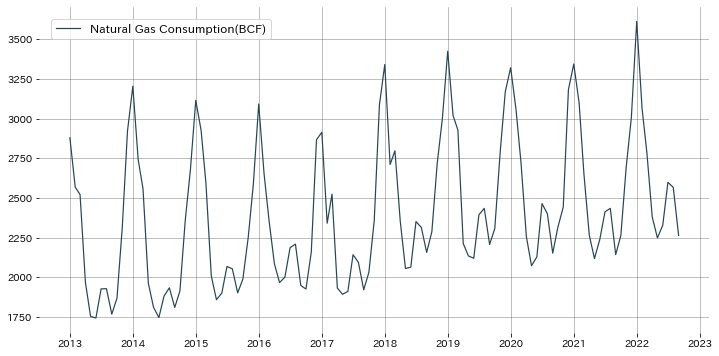

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data)
plt.grid()
plt.show()

## データの分割
データの末尾（2020年以降のデータ）を予測性能の検証に使用するためにデータを分割します。

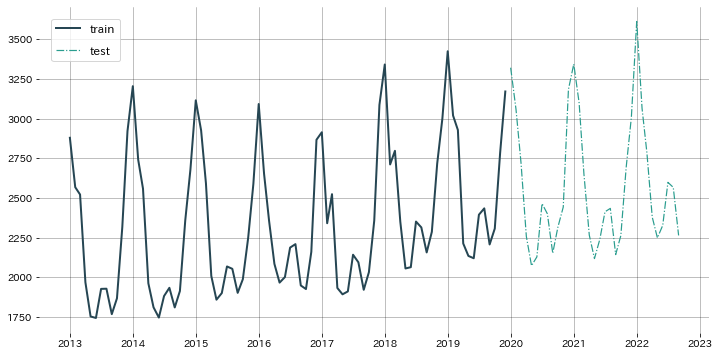

In [4]:
data_train = data[data.index < "2020-1-1"]
data_test = data[data.index >= "2020-1-1"]

plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train.values, label="train", linewidth=2)
plt.plot(data_test.index, data_test.values, "-.", label="test")
plt.legend()
plt.grid()

## モデルの学習と予測

In [5]:
ses = SimpleExpSmoothing(data_train)
ses = ses.fit(smoothing_level=0.1)
ses_pred = ses.forecast(33)

holt = Holt(data_train)
holt = holt.fit(smoothing_level=0.1, smoothing_trend=0.2)
holt_pred = holt.forecast(33)

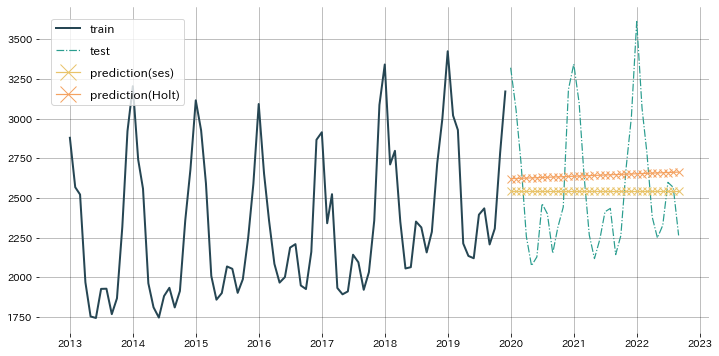

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train.values, label="train", linewidth=2)
plt.plot(data_test.index, data_test.values, "-.", label="test")
plt.plot(ses_pred.index, ses_pred.values, "-x", label="prediction(ses)")
plt.plot(holt_pred.index, holt_pred.values, "-x", label="prediction(Holt)")
plt.legend()
plt.grid()